### Fraud Detection
* In this notebook I use a publickly available dataset `'FraudDetection.xlsx'`to create a fraud detection model.

* I used Python in the first phase to prepare the data and split it into **training** and **test** datasets.

* Then I use [Gretl](https://gretl.sourceforge.net/) to create the model and extract the required **predictions** for further processing using Python.

* The **Cumulative Accuary Profile (CAP)** curve was produced using excel.

* The accuary of the model on both training and test dataset is above **90%** with no signs of overfitting!!!

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from sklearn import metrics, linear_model, preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('FraudDetection.xlsx', na_values = 'NA')
print(df.shape)
df.head()

(16281, 15)


,Transaction_ID,Card Tenure_months,WebsiteRegion,Trans_value,Seller_Category,Items_transaction,Shipping_Address,Purchase_Category,Othercard_owner,Seller_way,LastTransaction,Lastflagedvalue,LastMonthsTrans_Freq,Countryissuedcard,Fraud_Detected
0,1,25,US,256.41,Store + online,10,US,online services,Dependent,Yes,0,0,40,United-States,No
1,2,38,US,409.54,Online only,8,International,Accessories,Husband,Yes,0,0,50,United-States,No
2,3,28,EU,293.09,Online only,5,International,Electornics,Husband,Yes,0,0,40,United-States,Yes
3,4,44,US,444.07,Online only,7,International,online services,Husband,Yes,7688,0,40,United-States,Yes
4,5,18,EU,183.11,Online only,7,US,Food,Dependent,No,0,0,30,United-States,No


In [3]:
df_new = df.copy()
df_new.rename(columns = {'Transaction_ID': 'ID', 'Fraud_Detected': 'target', 'Card Tenure_months': 'Tenure'}, inplace = True)
df_new.rename(columns = {'Trans_value': 'TransValue', 'Seller_Category': 'SellerCategory'}, inplace = True)
df_new.rename(columns = {'Items_transaction': 'ItemsTransaction', 'Shipping_Address': 'ShippingAddress'}, inplace = True)
df_new.rename(columns = {'Purchase_Category': 'PurchaseCategory', 'Countryissuedcard': 'CountryIssuedCard'}, inplace = True)
df_new.rename(columns = {'Othercard_owner': 'OtherCardOwner', 'LastMonthsTrans_Freq': 'LastMonthsTransFreq'}, inplace = True)
df_new.rename(columns = {'Lastflagedvalue': 'LastFlagedValue', 'Seller_way': 'SellerWay'}, inplace = True)
df_new.head()

,ID,Tenure,WebsiteRegion,TransValue,SellerCategory,ItemsTransaction,ShippingAddress,PurchaseCategory,OtherCardOwner,SellerWay,LastTransaction,LastFlagedValue,LastMonthsTransFreq,CountryIssuedCard,target
0,1,25,US,256.41,Store + online,10,US,online services,Dependent,Yes,0,0,40,United-States,No
1,2,38,US,409.54,Online only,8,International,Accessories,Husband,Yes,0,0,50,United-States,No
2,3,28,EU,293.09,Online only,5,International,Electornics,Husband,Yes,0,0,40,United-States,Yes
3,4,44,US,444.07,Online only,7,International,online services,Husband,Yes,7688,0,40,United-States,Yes
4,5,18,EU,183.11,Online only,7,US,Food,Dependent,No,0,0,30,United-States,No


In [4]:
df_new['target'] = (df_new.target == 'Yes') + 0 
df_new['SellerWay'] = (df_new.SellerWay == 'Yes') + 0 
df_new.head()

,ID,Tenure,WebsiteRegion,TransValue,SellerCategory,ItemsTransaction,ShippingAddress,PurchaseCategory,OtherCardOwner,SellerWay,LastTransaction,LastFlagedValue,LastMonthsTransFreq,CountryIssuedCard,target
0,1,25,US,256.41,Store + online,10,US,online services,Dependent,1,0,0,40,United-States,0
1,2,38,US,409.54,Online only,8,International,Accessories,Husband,1,0,0,50,United-States,0
2,3,28,EU,293.09,Online only,5,International,Electornics,Husband,1,0,0,40,United-States,1
3,4,44,US,444.07,Online only,7,International,online services,Husband,1,7688,0,40,United-States,1
4,5,18,EU,183.11,Online only,7,US,Food,Dependent,0,0,0,30,United-States,0


In [5]:
df_new.to_csv('fraud_detection.csv')

#### Split the data into training and testing data

In [6]:
fraud_train = df_new.sample(frac = 0.75, random_state = 45)
print(fraud_train.shape)

(12211, 15)


In [7]:
fraud_train.to_csv('fraud_train.csv')

In [8]:
fraud_test = df_new.drop(fraud_train.index)
print(fraud_test.shape)

(4070, 15)


In [9]:
fraud_test.to_csv('fraud_test.csv')

In [11]:
test_features = fraud_test.drop('target', axis = 1)
test_target = fraud_test.target

In [12]:
test_features.to_csv('test_features.csv')
test_target.to_csv('test_target.csv')

### Using Gretl
I use [Gretl](https://gretl.sourceforge.net/) to create the model and extract the required **predictions** for further processing...

#### Gretl Output

In [55]:
output = pd.read_clipboard()
output

,Coefficient,Std. Error,z,p-value,rating
Features,,,,,
const,−2.42168,0.393774,−6.150,<0.0001,***
TransValue,0.00234423,0.000248,9.452,<0.0001,***
ItemsTransaction,−0.299280,0.014433,−20.74,<0.0001,***
SellerWay,0.3969,0.122088,3.251,0.0012,***
LastTransaction,0.000348194,0.000018,19.59,<0.0001,***
LastFlagedValue,0.000714609,0.000061,11.68,<0.0001,***
LastMonthsTransFreq,0.0276648,0.002523,10.97,<0.0001,***
Web_EU,−0.251717,0.096554,−2.607,0.0091,***
Web_UC,−0.744908,0.099262,−7.504,<0.0001,***


Above are the selected **best predictors**. The **`pvalues << 0.05`** indicating that these predictors are strongly **correlated with the dependent variable, `target`**.

### Receiver Operating Characteristics(ROC) and Area Under Curve(AUC)
The area under the ROC is widely used to validate classification models. The **closer AUC is to 1 or 100% the better the model**.

**We use the ground truth `y_train`and the predicted probabilities `y_pred` to compute the `false positive rate (FPR)` and `true positive rate (TPR)` which are then used to calculate the `AUC` and to derived the `ROC` curve.**

**The prediction probabilities `y_pred` were produced by Gretl.**

In [27]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [28]:
ytrain_ypred = pd.read_csv('ytrain_y_pred.csv')
ytrain_ypred.head()

,y_train,y_pred
0,1,0.914936
1,0,0.077563
2,0,0.064761
3,1,0.523124
4,0,0.004375


In [29]:
y_train = ytrain_ypred.y_train
y_pred = ytrain_ypred.y_pred

false_pr, true_pr, thresholds = roc_curve(y_train, y_pred)     # False Positive Rate, True Positive Rate
auc_train = auc(false_pr, true_pr)                             # Area Under Curve
print(auc_train)

0.9043392476285955


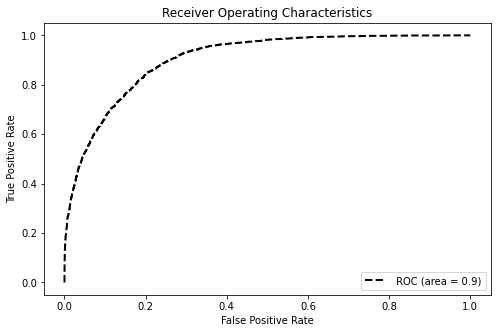

In [30]:
plt.figure(figsize = (8, 5))
plt.plot(false_pr, true_pr, 'k--', label = f' ROC (area = {round(auc_train, 2)})', lw = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

* The **Area Under Curve (AUC)** should higher than **0.5**, the closer it is to **1** the better.
* An AUC of **0.5** is the same as *random picking*
* A **too high AUC** might be a sign of **overfitting**

#### KS distance 
This is the **difference between `TPR` and `FPR`**. A KS distance of above **40%** is considered good!

In [31]:
kss = np.abs(true_pr - false_pr)             
ks = kss.max()                      # max distance
print(f'KS of the model is: {ks}')

KS of the model is: 0.6461485433894599


### Cummulative Accuracy Profile (CAP) - Training

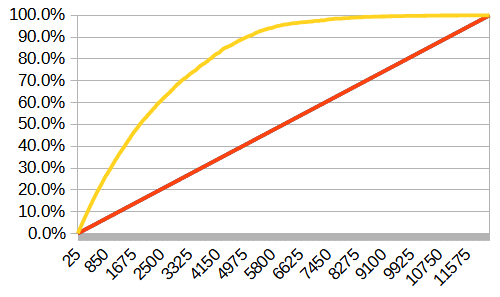            

### Ad Hoc Interpretation of the CAP curve

* Draw a vertical line at **50%** mark from the x-axis till it crosses the model curve.
* At the point, where this vertical line cuts the trained model curve is the **accuracy** read from the y-axis.

The following **rule of thumb** is used to interprete the accuracy:

1. Less than **60%** ==> Rubbish Model
2. Between **60% — 70%** ==> Poor Model
3. Between **70% — 80%** ==> Good Model
4. Between **80% — 90%** ==> Very Good Model
5. Above **90%** ==> Too Good to be True but possible

For this model the **50%** is around **6100** samples. This gives an accuracy of about **93%**!! It might be that the model is **overfitting**. However, the evaluation using test data suggest otherwise! **See below!**

### Evaluating the model using test dataset

In [37]:
ytest_ypred = pd.read_excel('test_prediction_probabilities.xlsx', usecols = ['Fraud', 'P_Hat_test'])
ytest_ypred.head()

,Fraud,P_Hat_test
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


In [38]:
ytest_ypred.rename(columns = {'Fraud': 'y_test', 'P_Hat_test': 'y_pred_test'}, inplace = True)

ytest_ypred.head()

,y_test,y_pred_test
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


In [39]:
y_test = ytest_ypred.y_test
y_pred_test = ytest_ypred.y_pred_test

false_pr, true_pr, thresholds = roc_curve(y_test, y_pred_test)     # fpr = False Positive Rate, tpr = True Positive Rate
auc_test = auc(false_pr, true_pr)                                     # Area Under Curve
print(auc_test)

0.8945468171823797


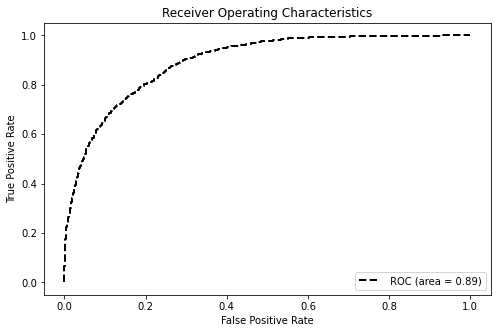

In [40]:
plt.figure(figsize = (8, 5))
plt.plot(false_pr, true_pr, 'k--', label = f' ROC (area = {round(auc_test, 2)})', lw = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc = 'lower right')
plt.show()

In [41]:
kss = np.abs(true_pr - false_pr)             
ks = kss.max()                      # max distance
print(f'KS of the model(test) is: {ks}')

KS of the model(test) is: 0.6125684680430328


### Cummulative Accuracy Profile (CAP) - Testing

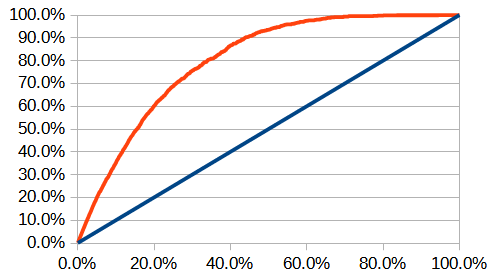

The accuracy of the model using the test data is also around **93%**!! This suggests that the model is **really good!!**

**This means that if 50% of the data is analysed without the model only 50% of the fraudulent cases would be discovered. But using the model, we would be able to identify about 90% of the fraudulent cases in the same amount of data!!** 

**Using the model the amount of backlog (incoming and unfinished work) would be reduced, the amount of staff needed to do the job would be reduced, the processing time would be shortened and at the same time more cases of fraudulent transactions would be tracked down in a given amount of data processed - `more than 40% increase in effeciency!`**

### Intepreting the logistic regression coefficient using Odds Ratio

In [43]:
coefs = pd.read_clipboard()

,Features,Coefficient,Calculated_odds_ratio
0,TransValue,0.002344,1.00235
1,ItemsTransaction,-0.299280,0.74135
2,SellerWay,0.396900,1.48721
3,LastTransaction,0.000348,1.00035
4,LastFlagedValue,0.000715,1.00071
5,LastMonthsTransFreq,0.027665,1.02805
6,Web_EU,-0.251717,0.77746
7,Web_UC,-0.744908,0.47478
8,Online_Only,0.281471,1.32508
9,Shipping_Int,2.088970,8.07659


In [57]:
coefs.style.background_gradient(subset = ['Calculated_odds_ratio'], cmap = 'Reds') 

,Features,Coefficient,Calculated_odds_ratio
0,TransValue,0.002344,1.002350
1,ItemsTransaction,-0.299280,0.741350
2,SellerWay,0.396900,1.487210
3,LastTransaction,0.000348,1.000350
4,LastFlagedValue,0.000715,1.000710
5,LastMonthsTransFreq,0.027665,1.028050
6,Web_EU,-0.251717,0.777460
7,Web_UC,-0.744908,0.474780
8,Online_Only,0.281471,1.325080
9,Shipping_Int,2.088970,8.076590


**It be seen that the most significant feature is `Shipping International`and Shipping to international destinations is linked to `Shopping Online`**. This is where most of the **fraud** take place!! 

All other features remaining constant, a switch in **`SellerWay`** from **NO** to  **YES** would increase the rate of fraud by almost **50%**! 

*Github didn't display heatmap in the Calculated_odds_ratio column so I created it using excel as below*

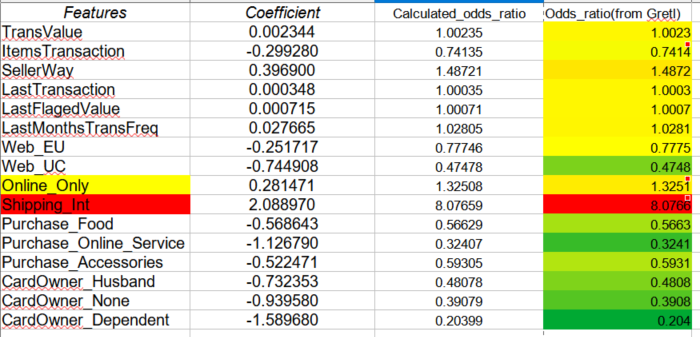

#### Presenting the Odds as bar plot

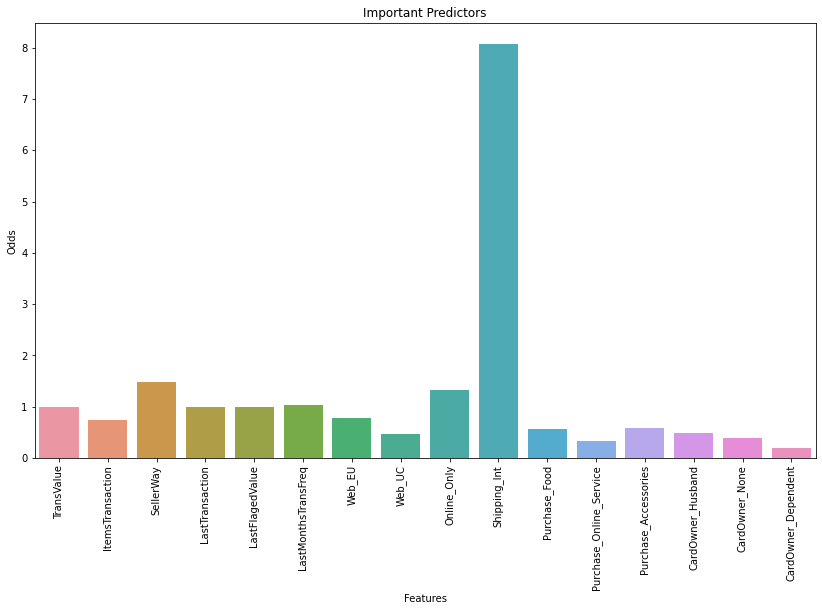

In [60]:
plt.figure(figsize = (14, 8))
sns.barplot(x = coefs.Features, y = coefs.Calculated_odds_ratio)
plt.title('Important Predictors')
plt.ylabel('Odds')
plt.xticks(rotation = 90)
plt.show()